# 1.Problem Statement

An MNIST-like dataset of 70,000(60k train and 10k test) 28x28 labeled fashion images.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

# 2.IMPORTING LIBRARIES AND DATASET

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


60k Rows and 784 Pixel columns with 1 label column

In [4]:
df.shape

(60000, 785)

Visualising How data looks like

In [5]:
df.sample(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18477,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


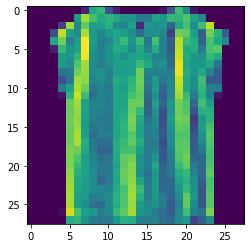

In [6]:
plt.imshow(df.iloc[14676,1:].values.reshape(-1,28))
#Showing Shirt 0->t-shirt

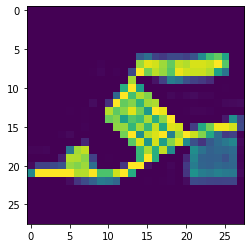

In [7]:
plt.imshow(df.iloc[17699,1:].values.reshape(-1,28))
#showing 5 as sandal

# 

# DATA CLEANING

In [8]:
#CHECKING FOR DUPLICACY
df.duplicated().sum()

43

43 Duplicates have been found.Lets check if similar labels are identical or not.lets say for label 6

In [9]:
df[df.label==6].head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
40,6,0,0,0,0,0,0,0,0,0,...,41,0,0,0,0,0,0,0,0,0
43,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,6,0,0,0,0,0,0,0,0,0,...,0,1,0,0,138,154,78,0,0,0
62,6,0,0,0,0,0,0,0,0,1,...,81,0,0,0,0,0,0,0,0,0


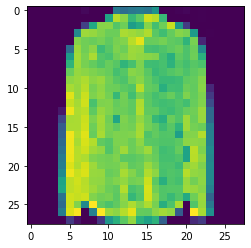

In [10]:
plt.imshow(df.iloc[2,1:].values.reshape(-1,28))

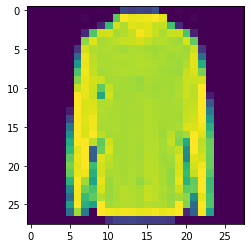

In [11]:
plt.imshow(df.iloc[40,1:].values.reshape(-1,28))

Through above images we can conclude that with label 6 (shirt) images of row 2 and 40 are not identitical and have varied intensity

In [12]:
#DROPPING DUPLICATES
df.drop_duplicates(inplace=True)

In [13]:
#checking format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59957 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.5 MB


In [14]:
df.shape

(59957, 785)

In [15]:
#checking null values
df_na=pd.DataFrame(df.isna().sum(),columns={'null_val'})#DF is created because of High dimension
df_na[df_na.null_val>0]
#No Null Values

,null_val


In [16]:
#checking counts of labels
df['label'].value_counts()

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64

# Model Building-Without PCA

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
x_train=df.iloc[:,1:]
y_train=df.iloc[:,0]


In [19]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

IMPORTING TEST DATASET

In [20]:
df_test=pd.read_csv(r'/kaggle/input/fashionmnist/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(59957, 785)

In [22]:
x_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

IMPORTING TIME MODULE TO CHECK TIME TAKEN FOR EXECUTION.

In [23]:
import time
start=time.time()
y_predict=knn.predict(x_test)
print(time.time()-start)

28.399935960769653


In [24]:
print(accuracy_score(y_test,y_predict))

0.8588


Time took for Prediction is 28 seconds approx and accuracy 86%(approx) without PCA

# PCA

Before moving to PCA,PCA is a statistical techinique to find Principal components or eigen vectors on which data can be Projected with High variance or without loosings its essence.

In [25]:
from sklearn.decomposition import PCA

In [26]:
#CHECKING WITH 100 COMPONENTS

In [27]:
pca_1=PCA(n_components=100)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss=StandardScaler()
x_train_s=ss.fit_transform(x_train)
x_test_s=ss.transform(x_test)

In [30]:
x_train_trf=pca_1.fit_transform(x_train_s)
x_test_trf=pca_1.transform(x_test_s)

In [31]:
x_train_trf.shape

(59957, 100)

In [32]:
knn_1=KNeighborsClassifier()

In [33]:
knn.fit(x_train_trf,y_train)


KNeighborsClassifier()

In [34]:
start=time.time()
y_predict_1=knn.predict(x_test_trf)
print(time.time()-start)

15.118163108825684


In [35]:
print(accuracy_score(y_test,y_predict_1))

0.8666


Check with 100 components time taken is lesser (14 seconds) than no PCA and accuracy also improved to 87%.


In [36]:
#check with 200 components
pca_2=PCA(n_components=200)
x_train_trf_2=pca_2.fit_transform(x_train_s)
x_test_trf_2=pca_2.transform(x_test_s) 

In [37]:
x_train_trf_2.shape

(59957, 200)

In [38]:
knn_2=KNeighborsClassifier()
knn_2.fit(x_train_trf_2,y_train)


KNeighborsClassifier()

In [39]:
start=time.time()
y_predict_2=knn_2.predict(x_test_trf_2)
print(time.time()-start)

17.46440076828003


In [40]:
accuracy_score(y_test,y_predict_2)

0.8696

A VERY VERY SLIIGHT DECREASE IN ACCURACY FROM 100 TO 200

# VARIANCE PARAMETERS

to check variance parameters for 100 components

In [41]:
#EIGEN VALUES
pca_1.explained_variance_
#eigen values of top 100 componenets

array([172.91636853, 112.86896997,  42.79218235,  40.11028094,
        31.90072627,  23.62407566,  21.56612704,  18.23346621,
        13.28240429,  10.26875183,   9.1071688 ,   7.55159075,
         6.98105525,   6.71734213,   5.8266424 ,   5.72400209,
         5.15487502,   4.96216043,   4.88937592,   4.5506916 ,
         4.04318829,   4.01099522,   3.70719547,   3.5567358 ,
         3.43797823,   3.26728798,   3.09769286,   3.08320241,
         2.96550811,   2.93636449,   2.88918502,   2.77105439,
         2.63814986,   2.58721817,   2.58348919,   2.50704749,
         2.39920478,   2.30259847,   2.26692545,   2.20282935,
         2.13237149,   2.08514907,   2.00415371,   1.98950751,
         1.92193897,   1.90733685,   1.87167774,   1.78831837,
         1.75095366,   1.6912868 ,   1.66688398,   1.63877246,
         1.58556518,   1.57930008,   1.56216047,   1.53066878,
         1.497199  ,   1.45537463,   1.42299918,   1.39709117,
         1.37753861,   1.35916034,   1.33903033,   1.31

In [42]:
# CORRESPONDING EIGEN VECTORS
pca_1.components_

array([[ 0.00031418,  0.00088176,  0.00149206, ...,  0.0064949 ,
         0.00146716,  0.00066803],
       [ 0.00017924,  0.00145036,  0.00115961, ...,  0.01408482,
         0.00961574,  0.00409093],
       [ 0.00011481,  0.0008581 ,  0.00188434, ...,  0.00894467,
        -0.002327  , -0.00124547],
       ...,
       [-0.06224168,  0.02267882,  0.08996714, ..., -0.0240935 ,
        -0.02000203, -0.02746777],
       [-0.03800962,  0.07866607,  0.00646046, ..., -0.0393504 ,
        -0.00482535, -0.05436519],
       [-0.07552355,  0.02355961,  0.03143191, ..., -0.03732187,
        -0.0303665 , -0.02238972]])

In [43]:
pca_1.components_.shape

(100, 784)

In [44]:
#variance ratio
pca_1.explained_variance_ratio_

array([0.22055291, 0.14396312, 0.05458095, 0.05116022, 0.04068902,
       0.03013225, 0.02750736, 0.02325658, 0.01694156, 0.01309768,
       0.01161609, 0.00963197, 0.00890426, 0.0085679 , 0.00743182,
       0.0073009 , 0.00657499, 0.00632918, 0.00623634, 0.00580436,
       0.00515704, 0.00511598, 0.00472849, 0.00453658, 0.0043851 ,
       0.00416739, 0.00395107, 0.00393259, 0.00378247, 0.0037453 ,
       0.00368512, 0.00353445, 0.00336493, 0.00329997, 0.00329521,
       0.00319771, 0.00306016, 0.00293694, 0.00289144, 0.00280968,
       0.00271982, 0.00265958, 0.00255628, 0.00253759, 0.00245141,
       0.00243279, 0.0023873 , 0.00228098, 0.00223332, 0.00215722,
       0.00212609, 0.00209024, 0.00202237, 0.00201438, 0.00199252,
       0.00195235, 0.00190966, 0.00185631, 0.00181502, 0.00178197,
       0.00175704, 0.00173359, 0.00170792, 0.00167551, 0.001612  ,
       0.00157114, 0.0015441 , 0.00150621, 0.0014839 , 0.00146028,
       0.00143883, 0.00142741, 0.00142041, 0.00139828, 0.00136

In [45]:
np.cumsum(pca_1.explained_variance_ratio_)

array([0.22055291, 0.36451604, 0.41909699, 0.47025721, 0.51094623,
       0.54107848, 0.56858584, 0.59184242, 0.60878398, 0.62188166,
       0.63349775, 0.64312972, 0.65203398, 0.66060188, 0.6680337 ,
       0.6753346 , 0.68190958, 0.68823876, 0.69447511, 0.70027946,
       0.70543651, 0.71055249, 0.71528097, 0.71981755, 0.72420265,
       0.72837004, 0.73232112, 0.73625371, 0.74003618, 0.74378148,
       0.7474666 , 0.75100105, 0.75436598, 0.75766595, 0.76096116,
       0.76415888, 0.76721903, 0.77015597, 0.77304741, 0.7758571 ,
       0.77857691, 0.7812365 , 0.78379277, 0.78633037, 0.78878178,
       0.79121457, 0.79360187, 0.79588285, 0.79811617, 0.80027339,
       0.80239948, 0.80448972, 0.80651209, 0.80852647, 0.81051899,
       0.81247134, 0.814381  , 0.81623731, 0.81805233, 0.81983431,
       0.82159134, 0.82332494, 0.82503286, 0.82670836, 0.82832037,
       0.82989151, 0.83143561, 0.83294181, 0.83442571, 0.83588599,
       0.83732482, 0.83875223, 0.84017264, 0.84157092, 0.84293

# OPTIMUM COMPONENETS


From the above cummulative sum we know that 100 componenets give only 87%of variance .We have to checkfor componenents giving atleast 90%variance

In [46]:
pca=PCA(n_components=None)


In [47]:
x_tr_o=pca.fit_transform(x_train_s)
x_ts_o=pca.transform(x_test_s)

In [48]:
pca.components_

array([[ 3.14177725e-04,  8.81763480e-04,  1.49206212e-03, ...,
         6.49489711e-03,  1.46716132e-03,  6.68026323e-04],
       [ 1.79241064e-04,  1.45036119e-03,  1.15960785e-03, ...,
         1.40848200e-02,  9.61573926e-03,  4.09093085e-03],
       [ 1.14809416e-04,  8.58101653e-04,  1.88433735e-03, ...,
         8.94466562e-03, -2.32700180e-03, -1.24546522e-03],
       ...,
       [ 3.49604092e-06,  7.67792037e-05,  9.83357791e-04, ...,
         1.80390260e-03, -1.91753216e-03,  3.66363717e-04],
       [ 2.96112495e-04, -1.00273362e-03,  1.03123896e-03, ...,
         3.12421099e-03, -1.24730049e-03, -3.33434323e-04],
       [ 1.84717584e-04, -8.57368868e-05,  1.98710725e-04, ...,
         5.09584619e-04, -3.77880097e-06, -3.74283137e-04]])

In [49]:
#eigen vectors
pca.components_.shape


(784, 784)

In [50]:
#variation
pca.explained_variance_ratio_

array([2.20552914e-01, 1.43963122e-01, 5.45809549e-02, 5.11602193e-02,
       4.06890232e-02, 3.01322470e-02, 2.75073563e-02, 2.32565843e-02,
       1.69415596e-02, 1.30976793e-02, 1.16160930e-02, 9.63197041e-03,
       8.90425871e-03, 8.56789553e-03, 7.43181790e-03, 7.30090133e-03,
       6.57498607e-03, 6.32918081e-03, 6.23634503e-03, 5.80435698e-03,
       5.15704237e-03, 5.11598042e-03, 4.72848735e-03, 4.53657898e-03,
       4.38510526e-03, 4.16739197e-03, 3.95107738e-03, 3.93259446e-03,
       3.78248284e-03, 3.74530461e-03, 3.68512715e-03, 3.53445794e-03,
       3.36494574e-03, 3.29998694e-03, 3.29522316e-03, 3.19772864e-03,
       3.06023432e-03, 2.93696597e-03, 2.89148099e-03, 2.80974631e-03,
       2.71986547e-03, 2.65963957e-03, 2.55640952e-03, 2.53769427e-03,
       2.45153773e-03, 2.43287539e-03, 2.38740427e-03, 2.28122103e-03,
       2.23364777e-03, 2.15739294e-03, 2.12649519e-03, 2.09055676e-03,
       2.02269142e-03, 2.01567290e-03, 1.99324037e-03, 1.95319736e-03,
      

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22055291, 0.36451604, 0.41909699, 0.47025721, 0.51094623,
       0.54107848, 0.56858584, 0.59184242, 0.60878398, 0.62188166,
       0.63349775, 0.64312972, 0.65203398, 0.66060188, 0.6680337 ,
       0.6753346 , 0.68190958, 0.68823876, 0.69447511, 0.70027947,
       0.70543651, 0.71055249, 0.71528098, 0.71981755, 0.72420266,
       0.72837005, 0.73232113, 0.73625372, 0.74003621, 0.74378151,
       0.74746664, 0.7510011 , 0.75436604, 0.75766603, 0.76096125,
       0.76415898, 0.76721922, 0.77015618, 0.77304766, 0.77585741,
       0.77857727, 0.78123691, 0.78379332, 0.78633102, 0.78878255,
       0.79121543, 0.79360283, 0.79588406, 0.7981177 , 0.8002751 ,
       0.80240159, 0.80449215, 0.80651484, 0.80853051, 0.81052375,
       0.81247695, 0.81438723, 0.81624495, 0.81806118, 0.8198436 ,
       0.82160114, 0.82333648, 0.82504665, 0.82672287, 0.82833624,
       0.8299105 , 0.83145715, 0.83296709, 0.83445451, 0.8359193 ,
       0.83736372, 0.83879563, 0.84022146, 0.84162425, 0.84299

In [52]:
y=np.cumsum(pca.explained_variance_ratio_)

In [53]:
i=0
c=0
while y[i]<=0.90:
    i=i+1
    c=c+1
print('Optimum number of components is ',c)

Optimum number of components is  136


In [54]:
pca_o=PCA(n_components=136)
x_tr_oo=pca_o.fit_transform(x_train_s)
x_ts_oo=pca_o.transform(x_test_s)


In [55]:
knn_o=KNeighborsClassifier()

In [56]:
knn.fit(x_tr_oo,y_train)
y_p_o=knn.predict(x_ts_oo)

In [57]:
accuracy_score(y_test,y_p_o)

0.8704

# Thank you